In [0]:
%fs ls "/FinalProject"

path,name,size,modificationTime
dbfs:/FinalProject/All_Candidates_Cleaned/,All_Candidates_Cleaned/,0,0
dbfs:/FinalProject/CCL_file_Cleaned/,CCL_file_Cleaned/,0,0
dbfs:/FinalProject/CI_1/,CI_1/,0,0
dbfs:/FinalProject/CI_2/,CI_2/,0,0
dbfs:/FinalProject/CI_3/,CI_3/,0,0
dbfs:/FinalProject/CI_4/,CI_4/,0,0
dbfs:/FinalProject/CI_5/,CI_5/,0,0
dbfs:/FinalProject/CI_6/,CI_6/,0,0
dbfs:/FinalProject/CI_7/,CI_7/,0,0
dbfs:/FinalProject/CI_8/,CI_8/,0,0


####All Candidates File

In [0]:
# Reading All Candiates parquet file for cleaning 
All_cand ="/FinalProject/all"
All_candidates = (spark
      .read
      .format("parquet")
      .option("path", All_cand)
      .load())

**Creating a method "shape" to show number of rows and columns for each file**

In [0]:
import pyspark
def Shape(dataFrame):
    return (dataFrame.count(), len(dataFrame.columns))
pyspark.sql.dataframe.DataFrame.shape = Shape
print(All_candidates.shape())

(3981, 30)


In [0]:
# Distinct checks whether the dataframe has duplicate values
print("distinct count: " + str(All_candidates.distinct().count()))

distinct count: 3981


In [0]:
from pyspark.sql.functions import col,isnan, when, count

All_candidates.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in All_candidates.columns[:10]]).show()
All_candidates.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in All_candidates.columns[10:20]]).show()
All_candidates.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in All_candidates.columns[20:30]]).show()

+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+
|CAND_ID|CAND_NAME|CAND_ICI|PTY_CD|CAND_PTY_AFFILIATION|TTL_RECEIPTS|TRANS_FROM_AUTH|TTL_DISB|TRANS_TO_AUTH|COH_BOP|
+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+
|      0|        0|      78|     0|                   1|           0|              0|       0|            0|      0|
+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+

+-------+------------+----------+-----------+---------------+----------------+-------------+-----------------+--------------+--------------------+
|COH_COP|CAND_CONTRIB|CAND_LOANS|OTHER_LOANS|CAND_LOAN_REPAY|OTHER_LOAN_REPAY|DEBTS_OWED_BY|TTL_INDIV_CONTRIB|CAND_OFFICE_ST|CAND_OFFICE_DISTRICT|
+-------+------------+----------+-----------+---------------+----------------+-------------+-----------------+----------

In [0]:
# Dropping the columns which have null values
null_columns=("SPEC_ELECTION","PRIM_ELECTION","RUN_ELECTION","GEN_ELECTION","GEN_ELECTION_PRECENT")
All_candidates=All_candidates.drop(*null_columns)
len(All_candidates.columns)

Out[5]: 25

In [0]:
display(All_candidates.describe())

summary,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
count,3981,3981,3903,3981,3980,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981
mean,null,null,null,1.6541070082893745,null,3490903.2603391143,199196.3327103742,3182462.0778698847,21569.690022607374,160973.92352172834,2696521.8314318014,1110614.6236347647,84475.35304948506,3220.5752851042453,509985.2855212257,14861.308646068828,62000.00327304696,6174937.332265763,0.0,8.351921627731725,614102.8374328063,1773.4558301934187,null,510921.42914594355,1284.31341873901
stddev,null,null,null,0.6416658107355816,null,8.233354043721126E7,5849210.709572181,6.819973962700449E7,326093.2548138953,985554.3443694386,1.5464019963747975E8,4.8379044930261254E7,1152036.1495016995,128069.37137991715,3.0488734755703248E7,796930.105425312,825966.27195719,2.9935798304538614E8,0.0,10.60278665607577,3.0485939003770217E7,49372.89487688053,null,3.0487148164347306E7,8512.58424575805
min,H0AL01055,ANGELA GLASS,C,1,AMP,-674132.5,0.0,-674157.5,0.0,-21673.46,-380765.96,0.0,0.0,0.0,0.0,0.0,-15000.0,-900.0,00,00,0.0,0.0,01/01/2019,-37410.0,-20400.0
max,S8WV00143,"ZUNKER, TRICIA",O,3,WFP,4.824617973E9,2.7517652812E8,3.848951085E9,1.0415E7,3.0E7,9.7566690782E9,2.831281203E9,5.001902222E7,7300000.0,1.9235003E9,4.998711567E7,5.00186604E7,1.8853982587E10,WY,53,1.9235003E9,3100000.0,12/31/2020,1.9235003E9,224100.0


In [0]:
from pyspark.sql.functions import when, lit

In [0]:
TTL_RECEIPTS_correct = when(((All_candidates['TRANS_FROM_AUTH'] != 0.0) & (All_candidates['TRANS_TO_AUTH'] != 0.0)), ((All_candidates['TTL_RECEIPTS'] - All_candidates['TRANS_FROM_AUTH'])))
All_candidates = All_candidates.withColumn('TTL_RECEIPTS_CORRECTED', TTL_RECEIPTS_correct)
All_candidates.shape()

Out[8]: (3981, 26)

In [0]:
All_candidates.printSchema()

root
 |-- CAND_ID: string (nullable = true)
 |-- CAND_NAME: string (nullable = true)
 |-- CAND_ICI: string (nullable = true)
 |-- PTY_CD: integer (nullable = true)
 |-- CAND_PTY_AFFILIATION: string (nullable = true)
 |-- TTL_RECEIPTS: double (nullable = true)
 |-- TRANS_FROM_AUTH: double (nullable = true)
 |-- TTL_DISB: double (nullable = true)
 |-- TRANS_TO_AUTH: double (nullable = true)
 |-- COH_BOP: double (nullable = true)
 |-- COH_COP: double (nullable = true)
 |-- CAND_CONTRIB: double (nullable = true)
 |-- CAND_LOANS: double (nullable = true)
 |-- OTHER_LOANS: double (nullable = true)
 |-- CAND_LOAN_REPAY: double (nullable = true)
 |-- OTHER_LOAN_REPAY: double (nullable = true)
 |-- DEBTS_OWED_BY: double (nullable = true)
 |-- TTL_INDIV_CONTRIB: double (nullable = true)
 |-- CAND_OFFICE_ST: string (nullable = true)
 |-- CAND_OFFICE_DISTRICT: string (nullable = true)
 |-- OTHER_POL_CMTE_CONTRIB: double (nullable = true)
 |-- POL_PTY_CONTRIB: double (nullable = true)
 |-- CVG_END_

In [0]:
All_candidates.select('TRANS_FROM_AUTH').show()

+---------------+
|TRANS_FROM_AUTH|
+---------------+
|      138304.94|
|            0.0|
|       60024.76|
|            0.0|
|            0.0|
|            0.0|
|      102070.05|
|            0.0|
|            0.0|
|            0.0|
|            0.0|
|       19259.14|
|          11.32|
|            0.0|
|            0.0|
|            0.0|
|            0.0|
|            0.0|
|            0.0|
|         3351.7|
+---------------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import coalesce
All_candidates=All_candidates.withColumn('TTL_RECEIPTS_CORRECTED',coalesce(All_candidates.TTL_RECEIPTS_CORRECTED,All_candidates.TTL_RECEIPTS))                                                                         

In [0]:
All_candidates.select('TTL_RECEIPTS_CORRECTED').show()

+----------------------+
|TTL_RECEIPTS_CORRECTED|
+----------------------+
|            1950289.86|
|                   0.0|
|            5253251.54|
|              80094.95|
|             118661.85|
|              62935.42|
|            2344516.53|
|             182564.96|
|              491715.7|
|            1323944.09|
|              26809.68|
|              525384.2|
|              57722.77|
|               12230.0|
|              216297.5|
|               15043.0|
|            2615977.24|
|             286727.66|
|               22950.0|
|             476139.02|
+----------------------+
only showing top 20 rows



In [0]:
TTL_DISB_correct = when(((All_candidates['TRANS_FROM_AUTH'] != 0.0) & (All_candidates['TRANS_TO_AUTH'] != 0.0)), ((All_candidates['TTL_DISB'] - All_candidates['TRANS_TO_AUTH'])))
All_candidates = All_candidates.withColumn('TTL_DISB_CORRECTED', TTL_DISB_correct)

In [0]:
All_candidates=All_candidates.withColumn('TTL_DISB_CORRECTED',coalesce(All_candidates.TTL_DISB_CORRECTED,All_candidates.TTL_DISB))

In [0]:
All_candidates.select("CAND_ICI").distinct().show()

+--------+
|CAND_ICI|
+--------+
|    null|
|       O|
|       C|
|       I|
+--------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

All_candidates=All_candidates.withColumn('CAND_ICI', 
      when((All_candidates.CAND_ICI == 'C'),regexp_replace(All_candidates.CAND_ICI,'C','Challenger')) \
     .when((All_candidates.CAND_ICI == 'I'),regexp_replace(All_candidates.CAND_ICI,'I','Incumbent')) \
     .when((All_candidates.CAND_ICI == 'O'),regexp_replace(All_candidates.CAND_ICI,'O','Open Seat')))

In [0]:
All_candidates=All_candidates.na.fill("Unkown")
All_candidates.select("CAND_ICI").distinct().show()
All_candidates.shape()

+----------+
|  CAND_ICI|
+----------+
| Open Seat|
|    Unkown|
|Challenger|
| Incumbent|
+----------+

Out[17]: (3981, 27)

In [0]:
All_candidates.select("CAND_OFFICE_DISTRICT").take(10)

Out[18]: [Row(CAND_OFFICE_DISTRICT='00'),
 Row(CAND_OFFICE_DISTRICT='00'),
 Row(CAND_OFFICE_DISTRICT='00'),
 Row(CAND_OFFICE_DISTRICT='01'),
 Row(CAND_OFFICE_DISTRICT='01'),
 Row(CAND_OFFICE_DISTRICT='01'),
 Row(CAND_OFFICE_DISTRICT='01'),
 Row(CAND_OFFICE_DISTRICT='01'),
 Row(CAND_OFFICE_DISTRICT='01'),
 Row(CAND_OFFICE_DISTRICT='01')]

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [0]:
import pyspark.pandas as ps

In [0]:
import IPython

In [0]:

pandas_df = All_candidates.select("*").toPandas()

In [0]:
pandas_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,...,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,TTL_RECEIPTS_CORRECTED,TTL_DISB_CORRECTED
0,H6AK00045,"YOUNG, DONALD E",Incumbent,2,REP,1950289.86,138304.94,1817836.79,0.00,116720.12,...,963416.04,AK,00,839094.63,500.0,12/31/2020,19609.67,5500.0,1950289.86,1817836.79
1,H8AK01031,"NELSON, THOMAS JOHN",Challenger,2,REP,0.00,0.00,466.51,0.00,466.51,...,0.00,AK,00,0.00,0.0,03/31/2019,0.00,0.0,0.00,466.51
2,H8AK00140,"GALVIN, ALYSE",Challenger,3,IND,5253251.54,60024.76,5162902.93,0.00,6245.09,...,4796137.47,AK,00,340486.99,10025.0,12/31/2020,32594.02,0.0,5253251.54,5162902.93
3,H0AL01097,"AVERHART, JAMES",Open Seat,1,DEM,80094.95,0.00,78973.24,0.00,0.00,...,50849.95,AL,01,0.00,0.0,12/31/2020,0.00,0.0,80094.95,78973.24
4,H0AL01105,"GARDNER, KIANI A",Open Seat,1,DEM,118661.85,0.00,118661.85,0.00,0.00,...,92896.88,AL,01,19000.00,0.0,07/31/2020,0.00,0.0,118661.85,118661.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,S0WY00186,"HOLTHUS, ROLLAND SCOTT MR",Open Seat,2,REP,4291.94,0.00,4291.94,0.00,0.00,...,0.00,WY,00,0.00,0.0,07/07/2020,0.00,0.0,4291.94,4291.94
3977,S4WY00097,"HARDY, CHARLES E",Challenger,2,REP,0.00,0.00,165.00,0.00,165.00,...,0.00,WY,00,0.00,0.0,03/28/2019,0.00,0.0,0.00,165.00
3978,S4WY00147,"MILLER, BRYAN",Open Seat,2,REP,50876.53,3685.02,50876.53,3685.02,0.00,...,16290.00,WY,00,0.00,0.0,12/31/2020,0.00,0.0,47191.51,47191.51
3979,S6WY00068,"BARRASSO, JOHN A",Incumbent,2,REP,1008180.71,28538.06,844064.26,0.00,3957773.06,...,547166.39,WY,00,416150.00,0.0,12/31/2020,0.00,9300.0,1008180.71,844064.26


### ML Application to predict the total expenditure spent based on money collected

##### Linear Regression to predict the contribution

In [0]:
x = pandas_df.TTL_RECEIPTS_CORRECTED.values
y = pandas_df.TTL_DISB_CORRECTED.values


In [0]:
a = x[:500]
b = y[:500]

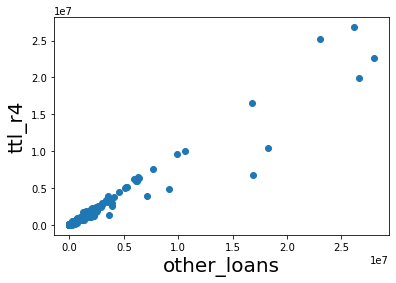

In [0]:
import matplotlib.pyplot as plt
plt.scatter(a,b)
 
plt.xlabel("other_loans", fontsize = 20)
 
plt.ylabel("ttl_r4", fontsize = 20)
 
plt.show()


In [0]:
length = 3981
x = x.reshape(length, 1)
y = y.reshape(length, 1)

In [0]:
model = LinearRegression()

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3184, 1)
(797, 1)
(3184, 1)
(797, 1)


In [0]:
model.fit(x_train, y_train)

Out[31]: LinearRegression()

In [0]:
training_data_prediction = model.predict(x_test) 


In [0]:
import sklearn.metrics as sm
from pyspark.sql.functions import *
import pyspark.sql.functions as func
print("Mean absolute error =",(sm.mean_absolute_error(y_test, training_data_prediction), 2)) 
print("Mean squared error =", (sm.mean_squared_error(y_test, training_data_prediction), 2)) 
print("Median absolute error =", (sm.median_absolute_error(y_test, training_data_prediction), 2)) 
print("Explain variance score =", (sm.explained_variance_score(y_test, training_data_prediction), 2)) 
print("R2 Score = ", (sm.r2_score(y_test, training_data_prediction), 2))

Mean absolute error = (574439.8427819123, 2)
Mean squared error = (1310482867109.2986, 2)
Median absolute error = (457334.50668525574, 2)
Explain variance score = (0.9652343290967791, 2)
R2 Score =  (0.9628120579557788, 2)


##### An R2 score near 1 means that the model is able to predict the data very well.

In [0]:
All_candidates.write.option("header",True) \
        .partitionBy("CAND_ICI") \
        .mode("overwrite") \
        .parquet("/FinalProject/All_Candidates_Cleaned")

In [0]:
from pyspark.sql.functions import col,isnan, when, count

All_candidates.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in All_candidates.columns[:10]]).show()
All_candidates.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in All_candidates.columns[10:20]]).show()
All_candidates.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in All_candidates.columns[20:30]]).show()

+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+
|CAND_ID|CAND_NAME|CAND_ICI|PTY_CD|CAND_PTY_AFFILIATION|TTL_RECEIPTS|TRANS_FROM_AUTH|TTL_DISB|TRANS_TO_AUTH|COH_BOP|
+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+
|      0|        0|       0|     0|                   0|           0|              0|       0|            0|      0|
+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+

+-------+------------+----------+-----------+---------------+----------------+-------------+-----------------+--------------+--------------------+
|COH_COP|CAND_CONTRIB|CAND_LOANS|OTHER_LOANS|CAND_LOAN_REPAY|OTHER_LOAN_REPAY|DEBTS_OWED_BY|TTL_INDIV_CONTRIB|CAND_OFFICE_ST|CAND_OFFICE_DISTRICT|
+-------+------------+----------+-----------+---------------+----------------+-------------+-----------------+----------

####PAC

In [0]:
PAC ="dbfs:/FinalProject/PAC/"
PAC_file = (spark
      .read
      .format("parquet")
      .option("path", PAC)
      .load())

In [0]:
PAC_file.shape()

Out[37]: (11534, 27)

In [0]:
from pyspark.sql.functions import col,isnan, when, count

PAC_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in PAC_file.columns[:9]]).show()
PAC_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in PAC_file.columns[10:19]]).show()
PAC_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in PAC_file.columns[20:27]]).show()

+-------+-------+-------+---------+----------------+------------+--------------+------------+----------------------+
|CMTE_ID|CMTE_NM|CMTE_TP|CMTE_DSGN|CMTE_FILING_FREQ|TTL_RECEIPTS|TRANS_FROM_AFF|INDV_CONTRIB|OTHER_POL_CMTE_CONTRIB|
+-------+-------+-------+---------+----------------+------------+--------------+------------+----------------------+
|      0|      0|      0|        1|               0|        2066|          2066|        2066|                  2066|
+-------+-------+-------+---------+----------------+------------+--------------+------------+----------------------+

+----------+------------------+--------+------------+------------+----------------------+---------------+----------+-------+
|CAND_LOANS|TTL_LOANS_RECEIVED|TTL_DISB|TRANF_TO_AFF|INDV_REFUNDS|OTHER_POL_CMTE_REFUNDS|CAND_LOAN_REPAY|LOAN_REPAY|COH_BOP|
+----------+------------------+--------+------------+------------+----------------------+---------------+----------+-------+
|      2066|              2066|    2066

In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

PAC_file=PAC_file.withColumn('CMTE_DSGN', 
      when((PAC_file.CMTE_DSGN == 'A'),regexp_replace(PAC_file.CMTE_DSGN,'A','Authorized by a candidate')) \
     .when((PAC_file.CMTE_DSGN == 'B'),regexp_replace(PAC_file.CMTE_DSGN,'B','Lobbyist/Registrant PAC')) \
     .when((PAC_file.CMTE_DSGN == 'D'),regexp_replace(PAC_file.CMTE_DSGN,'D','Leadership PAC')) \
     .when((PAC_file.CMTE_DSGN == 'J'),regexp_replace(PAC_file.CMTE_DSGN,'J','Joint fundraiser')) \
     .when((PAC_file.CMTE_DSGN == 'P'),regexp_replace(PAC_file.CMTE_DSGN,'P','Principal campaign committee of a candidate')) \
     .when((PAC_file.CMTE_DSGN == 'U'),regexp_replace(PAC_file.CMTE_DSGN,'U','Unauthorized'))) 

PAC_file.select("CMTE_DSGN").distinct().show()

+--------------------+
|           CMTE_DSGN|
+--------------------+
|        Unauthorized|
|Lobbyist/Registra...|
|                null|
|      Leadership PAC|
|Principal campaig...|
|    Joint fundraiser|
+--------------------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

PAC_file=PAC_file.withColumn('CMTE_FILING_FREQ', 
      when((PAC_file.CMTE_FILING_FREQ == 'A'),regexp_replace(PAC_file.CMTE_FILING_FREQ,'A','Administratively terminated')) \
     .when((PAC_file.CMTE_FILING_FREQ == 'D'),regexp_replace(PAC_file.CMTE_FILING_FREQ,'D','Debt')) \
     .when((PAC_file.CMTE_FILING_FREQ == 'M'),regexp_replace(PAC_file.CMTE_FILING_FREQ,'M','Monthly filer')) \
     .when((PAC_file.CMTE_FILING_FREQ == 'Q'),regexp_replace(PAC_file.CMTE_FILING_FREQ,'Q','Quarterly filer')) \
     .when((PAC_file.CMTE_FILING_FREQ == 'T'),regexp_replace(PAC_file.CMTE_FILING_FREQ,'T','Terminated')) \
     .when((PAC_file.CMTE_FILING_FREQ == 'W'),regexp_replace(PAC_file.CMTE_FILING_FREQ,'W','Waived'))) 

PAC_file.select("CMTE_FILING_FREQ").distinct().show()

+--------------------+
|    CMTE_FILING_FREQ|
+--------------------+
|       Monthly filer|
|          Terminated|
|     Quarterly filer|
|Administratively ...|
+--------------------+



In [0]:
PAC_file_df = PAC_file.select("*").toPandas()
PAC_file_df

,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,...,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT
0,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,Q,Lobbyist/Registrant PAC,Monthly filer,1617198.05,0.00,1572559.36,0.0,0.0,...,0.0,1142153.22,1036451.33,0.0,0.0,1293500.00,344800.0,0.0,0.0,12/31/2020
1,C00000489,D R I V E POLITICAL FUND CHAPTER 886,N,Unauthorized,Quarterly filer,77582.87,77582.87,0.00,0.0,0.0,...,0.0,13740.13,8047.37,0.0,0.0,0.00,0.0,0.0,0.0,12/31/2020
2,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,Q,Unauthorized,Quarterly filer,16400.00,0.00,16400.00,0.0,0.0,...,0.0,4878.76,3778.76,0.0,0.0,17500.00,0.0,0.0,0.0,12/31/2020
3,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,Q,Unauthorized,Terminated,1600.00,0.00,1000.00,0.0,0.0,...,0.0,111343.40,0.00,0.0,0.0,0.00,0.0,0.0,0.0,05/16/2019
4,C00000729,AMERICAN DENTAL ASSOCIATION POLITICAL ACTION C...,Q,Lobbyist/Registrant PAC,Monthly filer,2381239.79,104716.74,2242497.19,0.0,0.0,...,0.0,494921.79,375475.90,0.0,0.0,2107223.37,0.0,0.0,0.0,12/31/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11529,C00785717,WE THE PEOPLE USA PAC,N,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11530,C00785873,WE WANT TRUMP,O,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11531,C00777623,CALIFORNIANS AGAINST TYRANNY,N,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11532,C00778050,BLUE CONGRESS,O,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [0]:
PAC_file_df['CMTE_TP'] = PAC_file_df['CMTE_TP'].astype('category')

In [0]:
PAC_file_df

,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,...,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT
0,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,Q,Lobbyist/Registrant PAC,Monthly filer,1617198.05,0.00,1572559.36,0.0,0.0,...,0.0,1142153.22,1036451.33,0.0,0.0,1293500.00,344800.0,0.0,0.0,12/31/2020
1,C00000489,D R I V E POLITICAL FUND CHAPTER 886,N,Unauthorized,Quarterly filer,77582.87,77582.87,0.00,0.0,0.0,...,0.0,13740.13,8047.37,0.0,0.0,0.00,0.0,0.0,0.0,12/31/2020
2,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,Q,Unauthorized,Quarterly filer,16400.00,0.00,16400.00,0.0,0.0,...,0.0,4878.76,3778.76,0.0,0.0,17500.00,0.0,0.0,0.0,12/31/2020
3,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,Q,Unauthorized,Terminated,1600.00,0.00,1000.00,0.0,0.0,...,0.0,111343.40,0.00,0.0,0.0,0.00,0.0,0.0,0.0,05/16/2019
4,C00000729,AMERICAN DENTAL ASSOCIATION POLITICAL ACTION C...,Q,Lobbyist/Registrant PAC,Monthly filer,2381239.79,104716.74,2242497.19,0.0,0.0,...,0.0,494921.79,375475.90,0.0,0.0,2107223.37,0.0,0.0,0.0,12/31/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11529,C00785717,WE THE PEOPLE USA PAC,N,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11530,C00785873,WE WANT TRUMP,O,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11531,C00777623,CALIFORNIANS AGAINST TYRANNY,N,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11532,C00778050,BLUE CONGRESS,O,Unauthorized,Quarterly filer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [0]:
PAC_file_df['CMTE_TP'] = PAC_file_df['CMTE_TP'].cat.codes

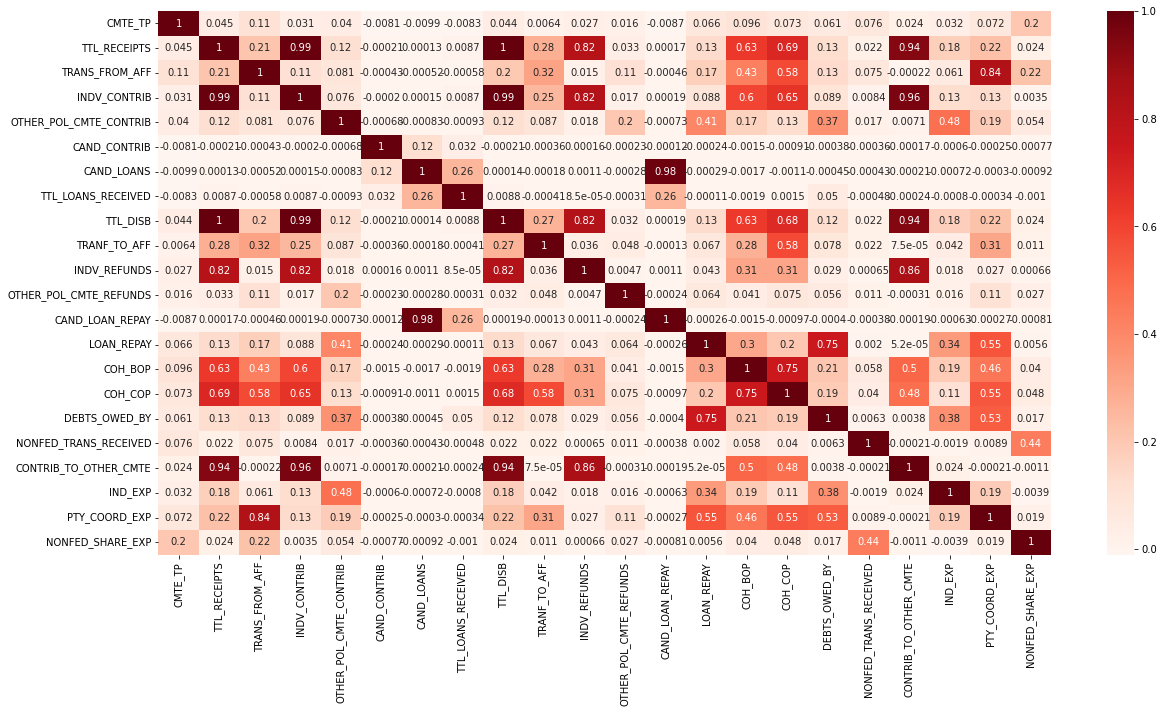

In [0]:
X_fs = PAC_file_df.drop(['CMTE_TP'], axis=1)
Y_fs = PAC_file_df['CMTE_TP']
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = PAC_file_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#Correlation with output variable
cor_target = (cor['CMTE_TP'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Out[46]: CMTE_TP             1.000000
TRANS_FROM_AFF      0.106400
NONFED_SHARE_EXP    0.202432
Name: CMTE_TP, dtype: float64

In [0]:
features = ['TRANS_FROM_AFF','NONFED_SHARE_EXP']
target = "CMTE_TP"


In [0]:
PAC_file_df1 = PAC_file_df[['TRANS_FROM_AFF','NONFED_SHARE_EXP','CMTE_TP']]

In [0]:
PAC_file_df1.dropna()
myarray1 = np.array([np.inf, -np.inf, np.nan, -165, 165])


In [0]:
PAC_file_df1

,TRANS_FROM_AFF,NONFED_SHARE_EXP,CMTE_TP
0,0.00,0.0,8
1,77582.87,0.0,5
2,0.00,0.0,8
3,0.00,0.0,8
4,104716.74,0.0,8
...,...,...,...
11529,NaN,NaN,5
11530,NaN,NaN,6
11531,NaN,NaN,5
11532,NaN,NaN,6


In [0]:
x, y = train_test_split(myarray1, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 3)

In [0]:
x_train = x[features]    #Features to train
y_train = x[target]      #Target Class to train
x_test = y[features]   #Features to test
y_test = y[target]

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 50,bootstrap = True, random_state = 42)
# Train the model on training data
rf.fit(x_train,y_train);

In [0]:
PAC_file.write.option("header",True) \
        .partitionBy("CMTE_FILING_FREQ") \
        .mode("overwrite") \
        .parquet("/FinalProject/PAC_Cleaned")

####Candidate Master

In [0]:
cand_master ="dbfs:/FinalProject/cand_master/"
cand_master_file = (spark
      .read
      .format("parquet")
      .option("path", cand_master)
      .load())

In [0]:
cand_master_file.shape()

Out[59]: (7770, 15)

In [0]:
from pyspark.sql.functions import col,isnan, when, count

cand_master_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cand_master_file.columns[:5]]).show()
cand_master_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cand_master_file.columns[5:10]]).show()
cand_master_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cand_master_file.columns[10:15]]).show()

+-------+---------+--------------------+----------------+--------------+
|CAND_ID|CAND_NAME|CAND_PTY_AFFILIATION|CAND_ELECTION_YR|CAND_OFFICE_ST|
+-------+---------+--------------------+----------------+--------------+
|      0|        0|                   5|               0|             0|
+-------+---------+--------------------+----------------+--------------+

+-----------+--------------------+--------+-----------+--------+
|CAND_OFFICE|CAND_OFFICE_DISTRICT|CAND_ICI|CAND_STATUS|CAND_PCC|
+-----------+--------------------+--------+-----------+--------+
|          0|                   7|     324|          0|    1424|
+-----------+--------------------+--------+-----------+--------+

+--------+--------+---------+-------+--------+
|CAND_ST1|CAND_ST2|CAND_CITY|CAND_ST|CAND_ZIP|
+--------+--------+---------+-------+--------+
|     188|    6853|        3|    179|     190|
+--------+--------+---------+-------+--------+



In [0]:
cand_master_file=cand_master_file.drop("CAND_ST2")
len(cand_master_file.columns)

Out[61]: 14

In [0]:
cand_master_file = cand_master_file.withColumn("CAND_ZIP", cand_master_file["CAND_ZIP"].cast('int'))
cand_master_file.schema["CAND_ZIP"].dataType

Out[62]: IntegerType()

In [0]:
from pyspark.sql.functions import *
cand_master_file = cand_master_file.withColumn('CAND_ZIP', lpad(cand_master_file.CAND_ZIP,5, '0'))
cand_master_file.select("CAND_ZIP").distinct().tail(5)

Out[63]: [Row(CAND_ZIP='23185'),
 Row(CAND_ZIP='30809'),
 Row(CAND_ZIP='70898'),
 Row(CAND_ZIP='82716'),
 Row(CAND_ZIP='39039')]

In [0]:
cand_master_file = cand_master_file.withColumn("CAND_OFFICE_DISTRICT", cand_master_file["CAND_OFFICE_DISTRICT"].cast('int'))

In [0]:
from pyspark.sql.functions import *
cand_master_file = cand_master_file.withColumn('CAND_OFFICE_DISTRICT', lpad(cand_master_file.CAND_OFFICE_DISTRICT,2, '0'))
cand_master_file.select("CAND_OFFICE_DISTRICT").distinct().tail(3)

Out[65]: [Row(CAND_OFFICE_DISTRICT='80'),
 Row(CAND_OFFICE_DISTRICT='50'),
 Row(CAND_OFFICE_DISTRICT='45')]

In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace
cand_master_file=cand_master_file.withColumn('CAND_OFFICE', 
when((cand_master_file.CAND_OFFICE == 'H'),regexp_replace(cand_master_file.CAND_OFFICE,'H','House')) \
.when((cand_master_file.CAND_OFFICE == 'S'),regexp_replace(cand_master_file.CAND_OFFICE,'S','Senate')) \
.when((cand_master_file.CAND_OFFICE == 'P'),regexp_replace(cand_master_file.CAND_OFFICE,'P','President'))) 
cand_master_file.select("CAND_OFFICE").distinct().show()

+-----------+
|CAND_OFFICE|
+-----------+
|     Senate|
|  President|
|      House|
+-----------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace
cand_master_file=cand_master_file.withColumn('CAND_STATUS', 
      when((cand_master_file.CAND_STATUS == 'C'),regexp_replace(cand_master_file.CAND_STATUS,'C','Statutory candidate')) \
     .when((cand_master_file.CAND_STATUS == 'F'),regexp_replace(cand_master_file.CAND_STATUS,'F','Statutory candidate for future election')) \
     .when((cand_master_file.CAND_STATUS == 'N'),regexp_replace(cand_master_file.CAND_STATUS,'N','Not yet a statutory candidate')) \
     .when((cand_master_file.CAND_STATUS == 'P'),regexp_replace(cand_master_file.CAND_STATUS,'P','Statutory candidate in prior cycle'))) 
cand_master_file.select("CAND_STATUS").distinct().show()

+--------------------+
|         CAND_STATUS|
+--------------------+
|Statutory candida...|
| Statutory candidate|
|Not yet a statuto...|
|Statutory candida...|
+--------------------+



In [0]:
cand_master_file.write.option("header",True) \
        .partitionBy("CAND_STATUS") \
        .mode("overwrite") \
        .parquet("/FinalProject/Candidate_Master_Cleaned")

####Candidate Committee Linkage

In [0]:
CCL ="dbfs:/FinalProject/ccl/"
CCL_file = (spark
      .read
      .format("parquet")
      .option("path", CCL)
      .load())

In [0]:
CCL_file.shape()

Out[70]: (7060, 7)

In [0]:
from pyspark.sql.functions import col,isnan, when, count

CCL_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in CCL_file.columns[:7]]).show()

+-------+----------------+---------------+-------+-------+---------+----------+
|CAND_ID|CAND_ELECTION_YR|FEC_ELECTION_YR|CMTE_ID|CMTE_TP|CMTE_DSGN|LINKAGE_ID|
+-------+----------------+---------------+-------+-------+---------+----------+
|      0|               0|              0|      0|      0|        0|         0|
+-------+----------------+---------------+-------+-------+---------+----------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace
CCL_file=CCL_file.withColumn('CMTE_DSGN', 
      when((CCL_file.CMTE_DSGN == 'A'),regexp_replace(CCL_file.CMTE_DSGN,'A','Authorized by a candidate')) \
     .when((CCL_file.CMTE_DSGN == 'B'),regexp_replace(CCL_file.CMTE_DSGN,'B','Lobbyist/Registrant PAC')) \
     .when((CCL_file.CMTE_DSGN == 'D'),regexp_replace(CCL_file.CMTE_DSGN,'D','Leadership PAC')) \
     .when((CCL_file.CMTE_DSGN == 'J'),regexp_replace(CCL_file.CMTE_DSGN,'J','Joint fundraiser')) \
     .when((CCL_file.CMTE_DSGN == 'P'),regexp_replace(CCL_file.CMTE_DSGN,'P','Principal campaign committee of a candidate')) \
     .when((CCL_file.CMTE_DSGN == 'U'),regexp_replace(CCL_file.CMTE_DSGN,'U','Unauthorized'))) 
CCL_file.select("CMTE_DSGN").distinct().show()

+--------------------+
|           CMTE_DSGN|
+--------------------+
|        Unauthorized|
|Lobbyist/Registra...|
|Authorized by a c...|
|Principal campaig...|
|    Joint fundraiser|
+--------------------+



In [0]:
CCL_file.where(CCL_file.CMTE_DSGN.contains('candidate')).count()

Out[73]: 6626

In [0]:
CCL_file_df = CCL_file.select("*").toPandas()

In [0]:
CCL_file_df

,CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
0,H0AK00105,2020,2020,C00607515,H,Principal campaign committee of a candidate,229250
1,H0AL01055,2020,2020,C00697789,H,Principal campaign committee of a candidate,226125
2,H0AL01063,2020,2020,C00701557,H,Principal campaign committee of a candidate,227053
3,H0AL01071,2020,2020,C00701409,H,Principal campaign committee of a candidate,227054
4,H0AL01089,2020,2020,C00703066,H,Principal campaign committee of a candidate,227266
...,...,...,...,...,...,...,...
7055,S8WV00143,2018,2020,C00689471,S,Joint fundraiser,225486
7056,S8WV00143,2018,2020,C00710889,N,Unauthorized,228546
7057,S8WV00143,2018,2020,C00417063,Y,Unauthorized,228545
7058,S8WY00189,2018,2020,C00663146,S,Principal campaign committee of a candidate,223873


In [0]:
CCL_file.write.option("header",True) \
.mode("overwrite") \
.parquet("/FinalProject/CCL_file_Cleaned")

####Committee Master

In [0]:
committe_master ="dbfs:/FinalProject/cmt_mast/"
cmt_mast_file = (spark
      .read
      .format("parquet")
      .option("path", committe_master)
      .load())

In [0]:
cmt_mast_file.shape()

Out[78]: (18288, 15)

In [0]:
from pyspark.sql.functions import col,isnan, when, count
cmt_mast_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cmt_mast_file.columns[:5]]).show()
cmt_mast_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cmt_mast_file.columns[5:10]]).show()
cmt_mast_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cmt_mast_file.columns[10:15]]).show()

+-------+-------+-------+--------+--------+
|CMTE_ID|CMTE_NM|TRES_NM|CMTE_ST1|CMTE_ST2|
+-------+-------+-------+--------+--------+
|      0|      2|    729|       8|   13768|
+-------+-------+-------+--------+--------+

+---------+-------+--------+---------+-------+
|CMTE_CITY|CMTE_ST|CMTE_ZIP|CMTE_DSGN|CMTE_TP|
+---------+-------+--------+---------+-------+
|        9|      8|      13|        5|      5|
+---------+-------+--------+---------+-------+

+--------------------+----------------+------+----------------+-------+
|CMTE_PTY_AFFILIATION|CMTE_FILING_FREQ|ORG_TP|CONNECTED_ORG_NM|CAND_ID|
+--------------------+----------------+------+----------------+-------+
|               10484|               0| 15039|            9004|  11557|
+--------------------+----------------+------+----------------+-------+



In [0]:
cmt_mast_file=cmt_mast_file.drop("CMTE_ST2")
len(cmt_mast_file.columns)

Out[80]: 14

In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

cmt_mast_file=cmt_mast_file.withColumn('CMTE_DSGN', 
      when((cmt_mast_file.CMTE_DSGN == 'A'),regexp_replace(cmt_mast_file.CMTE_DSGN,'A','Authorized by a candidate')) \
     .when((cmt_mast_file.CMTE_DSGN == 'B'),regexp_replace(cmt_mast_file.CMTE_DSGN,'B','Lobbyist/Registrant PAC')) \
     .when((cmt_mast_file.CMTE_DSGN == 'D'),regexp_replace(cmt_mast_file.CMTE_DSGN,'D','Leadership PAC')) \
     .when((cmt_mast_file.CMTE_DSGN == 'J'),regexp_replace(cmt_mast_file.CMTE_DSGN,'J','Joint fundraiser')) \
     .when((cmt_mast_file.CMTE_DSGN == 'P'),regexp_replace(cmt_mast_file.CMTE_DSGN,'P','Principal campaign committee of a candidate')) \
     .when((cmt_mast_file.CMTE_DSGN == 'U'),regexp_replace(cmt_mast_file.CMTE_DSGN,'U','Unauthorized'))) 

cmt_mast_file.select("CMTE_DSGN").distinct().show()

+--------------------+
|           CMTE_DSGN|
+--------------------+
|        Unauthorized|
|Lobbyist/Registra...|
|                null|
|      Leadership PAC|
|Authorized by a c...|
|Principal campaig...|
|    Joint fundraiser|
+--------------------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

cmt_mast_file=cmt_mast_file.withColumn('CMTE_FILING_FREQ', 
      when((cmt_mast_file.CMTE_FILING_FREQ == 'A'),regexp_replace(cmt_mast_file.CMTE_FILING_FREQ,'A','Administratively terminated')) \
     .when((cmt_mast_file.CMTE_FILING_FREQ == 'D'),regexp_replace(cmt_mast_file.CMTE_FILING_FREQ,'D','Debt')) \
     .when((cmt_mast_file.CMTE_FILING_FREQ == 'M'),regexp_replace(cmt_mast_file.CMTE_FILING_FREQ,'M','Monthly filer')) \
     .when((cmt_mast_file.CMTE_FILING_FREQ == 'Q'),regexp_replace(cmt_mast_file.CMTE_FILING_FREQ,'Q','Quarterly filer')) \
     .when((cmt_mast_file.CMTE_FILING_FREQ == 'T'),regexp_replace(cmt_mast_file.CMTE_FILING_FREQ,'T','Terminated')) \
     .when((cmt_mast_file.CMTE_FILING_FREQ == 'W'),regexp_replace(cmt_mast_file.CMTE_FILING_FREQ,'W','Waived'))) 

cmt_mast_file.select("CMTE_FILING_FREQ").distinct().show()

+--------------------+
|    CMTE_FILING_FREQ|
+--------------------+
|       Monthly filer|
|          Terminated|
|     Quarterly filer|
|Administratively ...|
+--------------------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

cmt_mast_file=cmt_mast_file.withColumn('ORG_TP', 
      when((cmt_mast_file.ORG_TP == 'C'),regexp_replace(cmt_mast_file.ORG_TP,'C','Corporation')) \
     .when((cmt_mast_file.ORG_TP == 'L'),regexp_replace(cmt_mast_file.ORG_TP,'L','Labor organization')) \
     .when((cmt_mast_file.ORG_TP == 'M'),regexp_replace(cmt_mast_file.ORG_TP,'M','Membership organization')) \
     .when((cmt_mast_file.ORG_TP == 'T'),regexp_replace(cmt_mast_file.ORG_TP,'T','Trade association')) \
     .when((cmt_mast_file.ORG_TP == 'V'),regexp_replace(cmt_mast_file.ORG_TP,'V','Cooperative')) \
     .when((cmt_mast_file.ORG_TP == 'W'),regexp_replace(cmt_mast_file.ORG_TP,'W','Corporation without capital stock'))) 

cmt_mast_file.select("ORG_TP").distinct().show()

+--------------------+
|              ORG_TP|
+--------------------+
|                null|
|  Labor organization|
|         Cooperative|
|         Corporation|
|Membership organi...|
|Corporation witho...|
|   Trade association|
+--------------------+



In [0]:
cmt_mast_file.where(cmt_mast_file.CMTE_FILING_FREQ.contains('Quarterly filer')).count()

Out[84]: 11276

In [0]:
cmt_mast_file_df = cmt_mast_file.select("*").toPandas()
cmt_mast_file_df

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN MR.","25 MASSACHUSETTS AVE, NW",WASHINGTON,DC,200017400,Lobbyist/Registrant PAC,Q,None,Monthly filer,None,DELAWARE MEDICAL PAC,None
1,C00000489,D R I V E POLITICAL FUND CHAPTER 886,JERRY SIMS JR,3528 W RENO,OKLAHOMA CITY,OK,73107,Unauthorized,N,None,Quarterly filer,Labor organization,None,None
2,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,JERRY SLAUGHTER,623 SW 10TH AVE,TOPEKA,KS,666121627,Unauthorized,Q,UNK,Quarterly filer,Membership organization,KANSAS MEDICAL SOCIETY,None
3,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"ACHENBACH, GRANT MR.","322 CANAL WALK, CANAL LEVEL",INDIANAPOLIS,IN,46202,Unauthorized,Q,None,Terminated,Membership organization,None,None
4,C00000729,AMERICAN DENTAL ASSOCIATION POLITICAL ACTION C...,"BARNES, BRAD W DR.","1111 14TH STREET, NW",WASHINGTON,DC,200055627,Lobbyist/Registrant PAC,Q,UNK,Monthly filer,Membership organization,INDIANA DENTAL PAC,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,C90021114,MARK K JOSEPH,None,200 E PRATT ST SUITE 4100,BALTIMORE,MD,21202,Unauthorized,I,None,Quarterly filer,None,None,None
18284,C90021122,GARNOTT HALL,None,2918 OAKLEY AVE,BALTIMORE,MD,21215,Unauthorized,I,None,Quarterly filer,None,None,None
18285,C90021130,ASIAN PACIFIC ISLANDER POLITICAL ALLIANCE,None,5010 WALTON AVE,PHILADELPHIA,PA,19143,Unauthorized,I,None,Quarterly filer,None,None,None
18286,C90021155,NATIONAL WOMEN''S LAW CENTER ACTION FUND,None,11 DUPONT CIRCLE NW 8TH FLOOR,WASHINGTON,DC,20036,Unauthorized,I,None,Quarterly filer,None,None,None


In [0]:
cmt_mast_file.write.option("header",True) \
        .partitionBy("CMTE_FILING_FREQ") \
        .mode("overwrite") \
        .parquet("/FinalProject/cmt_mast_file_Cleaned")

####Contributions from committes to candidates & independent expenditures

In [0]:
cont_and_ind_exp ="dbfs:/FinalProject/cont_and_ind_exp/"
cont_and_ind_exp_file = (spark
      .read
      .format("parquet")
      .option("path", cont_and_ind_exp)
      .load())

In [0]:
cont_and_ind_exp_file.shape()

Out[88]: (889164, 22)

In [0]:
from pyspark.sql.functions import col,isnan, when, count
cont_and_ind_exp_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cont_and_ind_exp_file.columns[:7]]).show()
cont_and_ind_exp_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cont_and_ind_exp_file.columns[8:15]]).show()
cont_and_ind_exp_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in cont_and_ind_exp_file.columns[16:22]]).show()

+-------+---------+------+---------------+---------+--------------+---------+
|CMTE_ID|AMNDT_IND|RPT_TP|TRANSACTION_PGI|IMAGE_NUM|TRANSACTION_TP|ENTITY_TP|
+-------+---------+------+---------------+---------+--------------+---------+
|      0|        0|     0|           1868|        0|             0|     5101|
+-------+---------+------+---------------+---------+--------------+---------+

+----+-----+--------+--------+----------+--------------+---------------+
|CITY|STATE|ZIP_CODE|EMPLOYER|OCCUPATION|TRANSACTION_DT|TRANSACTION_AMT|
+----+-----+--------+--------+----------+--------------+---------------+
|1327| 1400|    1481|  889146|    889147|          5583|              0|
+----+-----+--------+--------+----------+--------------+---------------+

+-------+-------+--------+-------+---------+------+
|CAND_ID|TRAN_ID|FILE_NUM|MEMO_CD|MEMO_TEXT|SUB_ID|
+-------+-------+--------+-------+---------+------+
|   2015|    456|       0| 875931|   842592|     0|
+-------+-------+--------+-------+-

In [0]:
cs=("EMPLOYER","OCCUPATION","MEMO_CD","MEMO_TEXT")

cont_and_ind_exp_file=cont_and_ind_exp_file.drop(*cs)
len(cont_and_ind_exp_file.columns)

Out[90]: 18

In [0]:
from pyspark.sql.functions import *
cont_and_ind_exp_file = cont_and_ind_exp_file.withColumn("ZIP_CODE",cont_and_ind_exp_file["ZIP_CODE"].cast('int'))
cont_and_ind_exp_file = cont_and_ind_exp_file.withColumn('ZIP_CODE', lpad(cont_and_ind_exp_file.ZIP_CODE,5, '0'))
cont_and_ind_exp_file.select("ZIP_CODE").show()

+--------+
|ZIP_CODE|
+--------+
|   48333|
|   10022|
|   10022|
|   40201|
|   10022|
|   93389|
|   10022|
|   10022|
|   10022|
|   10022|
|   93389|
|   93290|
|   10022|
|   40201|
|   08210|
|   44021|
|   10022|
|   10022|
|   40201|
|   77469|
+--------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

cont_and_ind_exp_file=cont_and_ind_exp_file.withColumn('AMNDT_IND', 
      when((cont_and_ind_exp_file.AMNDT_IND == 'N'),regexp_replace(cont_and_ind_exp_file.AMNDT_IND,'N','New')) \
     .when((cont_and_ind_exp_file.AMNDT_IND == 'A'),regexp_replace(cont_and_ind_exp_file.AMNDT_IND,'A','Amendment')) \
     .when((cont_and_ind_exp_file.AMNDT_IND == 'T'),regexp_replace(cont_and_ind_exp_file.AMNDT_IND,'T','Termination'))) 

cont_and_ind_exp_file.select("AMNDT_IND").distinct().show()

+-----------+
|  AMNDT_IND|
+-----------+
|Termination|
|        New|
|  Amendment|
+-----------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

cont_and_ind_exp_file=cont_and_ind_exp_file.withColumn('TRANSACTION_PGI', 
      when((cont_and_ind_exp_file.TRANSACTION_PGI.contains("P")),regexp_replace(cont_and_ind_exp_file.TRANSACTION_PGI,'P','Primary ')) \
     .when((cont_and_ind_exp_file.TRANSACTION_PGI.contains("G")),regexp_replace(cont_and_ind_exp_file.TRANSACTION_PGI,'G','General ')) \
     .when((cont_and_ind_exp_file.TRANSACTION_PGI.contains("O")),regexp_replace(cont_and_ind_exp_file.TRANSACTION_PGI,'O','Other ')) \
     .when((cont_and_ind_exp_file.TRANSACTION_PGI.contains("C")),regexp_replace(cont_and_ind_exp_file.TRANSACTION_PGI,'C','Convention ')) \
     .when((cont_and_ind_exp_file.TRANSACTION_PGI.contains("R")),regexp_replace(cont_and_ind_exp_file.TRANSACTION_PGI,'R','Runoff ')) \
     .when((cont_and_ind_exp_file.TRANSACTION_PGI.contains("S")),regexp_replace(cont_and_ind_exp_file.TRANSACTION_PGI,'S','Special ')) \
     .when((cont_and_ind_exp_file.TRANSACTION_PGI.contains("E")),regexp_replace(cont_and_ind_exp_file.TRANSACTION_PGI,'E','Recount ')))

cont_and_ind_exp_file.select("TRANSACTION_PGI").distinct().show()

+---------------+
|TRANSACTION_PGI|
+---------------+
|   General 2024|
|   General 2020|
|   Primary 2016|
|   Primary 2021|
|           null|
|   Recount 2020|
|   Special 2021|
|   Primary 2018|
|   Primary 2024|
|   General 2022|
|   General 2021|
|   Special 2022|
|   General 2014|
|   Primary 2026|
|   General 2016|
|   General 2018|
|   Primary 2020|
|       Primary |
|    Runoff 2021|
|   Recount 2022|
+---------------+
only showing top 20 rows



In [0]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
cont_and_ind_exp_file = cont_and_ind_exp_file.withColumn("TRANSACTION_DT",col("TRANSACTION_DT").cast(IntegerType()))
cont_and_ind_exp_file.select("TRANSACTION_DT").show()

+--------------+
|TRANSACTION_DT|
+--------------+
|       9062020|
|       8032020|
|       8152020|
|       8242020|
|       7172020|
|       8032020|
|       9042020|
|       8202020|
|       7102020|
|       8172020|
|       9152020|
|       9092020|
|       9222020|
|       8262020|
|       7312020|
|       9022020|
|       9212020|
|       7022020|
|       9212020|
|       8192020|
+--------------+
only showing top 20 rows



In [0]:
from pyspark.sql.types import StringType
cont_and_ind_exp_file = cont_and_ind_exp_file.withColumn("TRANSACTION_DT",col("TRANSACTION_DT").cast(StringType()))
cont_and_ind_exp_file.select("TRANSACTION_DT").take(5)

Out[95]: [Row(TRANSACTION_DT='9062020'),
 Row(TRANSACTION_DT='8032020'),
 Row(TRANSACTION_DT='8152020'),
 Row(TRANSACTION_DT='8242020'),
 Row(TRANSACTION_DT='7172020')]

In [0]:
from pyspark.sql.functions import *

cont_and_ind_exp_file = cont_and_ind_exp_file.withColumn('TRANSACTION_DT', lpad(cont_and_ind_exp_file.TRANSACTION_DT,8, '0'))
cont_and_ind_exp_file.select("TRANSACTION_DT").take(3)

Out[96]: [Row(TRANSACTION_DT='09062020'),
 Row(TRANSACTION_DT='08032020'),
 Row(TRANSACTION_DT='08152020')]

In [0]:
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql.functions import from_unixtime, unix_timestamp
cont_and_ind_exp_file=cont_and_ind_exp_file.withColumn("TRANSACTION_DT",from_unixtime(unix_timestamp(col("TRANSACTION_DT"),'MMddyyyy'), 'MM-dd-yyyy'))
cont_and_ind_exp_file.select("TRANSACTION_DT").take(5)

Out[97]: [Row(TRANSACTION_DT='09-06-2020'),
 Row(TRANSACTION_DT='08-03-2020'),
 Row(TRANSACTION_DT='08-15-2020'),
 Row(TRANSACTION_DT='08-24-2020'),
 Row(TRANSACTION_DT='07-17-2020')]

In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

cont_and_ind_exp_file=cont_and_ind_exp_file.withColumn('ENTITY_TP', 
      when((cont_and_ind_exp_file.ENTITY_TP == 'CAN'),regexp_replace(cont_and_ind_exp_file.ENTITY_TP,'CAN','Candidate')) \
     .when((cont_and_ind_exp_file.ENTITY_TP == 'CCM'),regexp_replace(cont_and_ind_exp_file.ENTITY_TP,'CCM','Candidate Committee')) \
     .when((cont_and_ind_exp_file.ENTITY_TP == 'COM'),regexp_replace(cont_and_ind_exp_file.ENTITY_TP,'COM','Committee')) \
     .when((cont_and_ind_exp_file.ENTITY_TP == 'IND'),regexp_replace(cont_and_ind_exp_file.ENTITY_TP,'IND','Individual (a person)')) \
     .when((cont_and_ind_exp_file.ENTITY_TP == 'ORG'),regexp_replace(cont_and_ind_exp_file.ENTITY_TP,'ORG','Organization (not a committee and not a person)')) \
     .when((cont_and_ind_exp_file.ENTITY_TP == 'PAC'),regexp_replace(cont_and_ind_exp_file.ENTITY_TP,'PAC','Political Action Committee')) \
     .when((cont_and_ind_exp_file.ENTITY_TP == 'PTY'),regexp_replace(cont_and_ind_exp_file.ENTITY_TP,'PTY','Party Organization')))

cont_and_ind_exp_file.select("ENTITY_TP").distinct().show()

+--------------------+
|           ENTITY_TP|
+--------------------+
|Individual (a per...|
|Organization (not...|
|                null|
|           Committee|
| Candidate Committee|
|  Party Organization|
|           Candidate|
|Political Action ...|
+--------------------+



In [0]:
cont_and_ind_exp_file_df = cont_and_ind_exp_file.select("*").toPandas()
cont_and_ind_exp_file_df

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,SUB_ID
0,C00694323,Amendment,Q3,Primary 2020,202101259409284891,24K,Candidate Committee,"JOHN JAMES FOR SENATE, INC.",FARMINGTON HILLS,MI,48333,09-06-2020,21,C00651208,S8MI00372,AA1B89BA0EE4A410FB5A,1490496,4022420211183906051
1,C00694323,Amendment,Q3,Primary 2020,202101259409315994,24K,Candidate Committee,"DONALD J. TRUMP FOR PRESIDENT, INC.",NEW YORK,NY,10022,08-03-2020,42,C00580100,P80001571,AA385E859BCC048A5851,1490496,4022420211184009789
2,C00694323,Amendment,Q3,Primary 2020,202101259409307020,24K,Candidate Committee,"DONALD J. TRUMP FOR PRESIDENT, INC.",NEW YORK,NY,10022,08-15-2020,280,C00580100,P80001571,AA192AEF991104F2AABC,1490496,4022420211183893727
3,C00694323,Amendment,Q3,Primary 2020,202101259409302214,24K,Candidate Committee,MCCONNELL SENATE COMMITTEE,LOUISVILLE,KY,40201,08-24-2020,25,C00193342,S2KY00012,AA276BB96CCB24682BAC,1490496,4022420211183893041
4,C00694323,Amendment,Q3,Primary 2020,202101259409312276,24K,Candidate Committee,"DONALD J. TRUMP FOR PRESIDENT, INC.",NEW YORK,NY,10022,07-17-2020,15,C00580100,P80001571,AA115CE69084C47E1BF2,1490496,4022420211184014675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889159,C00027466,Amendment,30G,None,202111249469290879,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-27-2021,614,S4GA11285,S4GA11285,SF25.30GA.001,1550074,4120220211381023067
889160,C00027466,Amendment,30G,None,202111249469290866,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-28-2020,1423,S4GA11285,S4GA11285,SF25.30G.025,1550074,4120220211381023027
889161,C00027466,Amendment,30G,None,202111249469290866,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-28-2020,19405,S4GA11285,S4GA11285,SF25.30G.026,1550074,4120220211381023028
889162,C00027466,Amendment,30G,None,202111249469290866,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-28-2020,2213,S4GA11285,S4GA11285,SF25.30G.027,1550074,4120220211381023029


In [0]:
cont_and_ind_exp_file.write.option("header",True) \
        .partitionBy("ENTITY_TP") \
        .mode("overwrite") \
        .parquet("/FinalProject/cont_and_ind_exp_file_cleaned")

####House Senate current campaigns

In [0]:
House_senate ="dbfs:/FinalProject/senate"
House_senate_file = (spark
      .read
      .format("parquet")
      .option("path", House_senate)
      .load())

In [0]:
House_senate_file.shape()

Out[102]: (2639, 30)

In [0]:
from pyspark.sql.functions import col,isnan, when, count

House_senate_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in House_senate_file.columns[:10]]).show()
House_senate_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in House_senate_file.columns[11:20]]).show()
House_senate_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in House_senate_file.columns[21:30]]).show()

+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+
|CAND_ID|CAND_NAME|CAND_ICI|PTY_CD|CAND_PTY_AFFILIATION|TTL_RECEIPTS|TRANS_FROM_AUTH|TTL_DISB|TRANS_TO_AUTH|COH_BOP|
+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+
|      0|        0|       5|     0|                   0|           0|              0|       0|            0|      0|
+-------+---------+--------+------+--------------------+------------+---------------+--------+-------------+-------+

+------------+----------+-----------+---------------+----------------+-------------+-----------------+--------------+--------------------+
|CAND_CONTRIB|CAND_LOANS|OTHER_LOANS|CAND_LOAN_REPAY|OTHER_LOAN_REPAY|DEBTS_OWED_BY|TTL_INDIV_CONTRIB|CAND_OFFICE_ST|CAND_OFFICE_DISTRICT|
+------------+----------+-----------+---------------+----------------+-------------+-----------------+--------------+-------------------

In [0]:
cs=("PRIM_ELECTION","RUN_ELECTION","GEN_ELECTION","GEN_ELECTION_PRECENT")
House_senate_file=House_senate_file.drop(*cs)
len(House_senate_file.columns)

Out[104]: 26

In [0]:
from pyspark.sql.functions import when, lit
conditions = when(((House_senate_file['TRANS_FROM_AUTH'] != 0.0) & (House_senate_file['TRANS_TO_AUTH'] != 0.0)), ((House_senate_file['TTL_RECEIPTS'] - House_senate_file['TRANS_FROM_AUTH'])))
House_senate_file = House_senate_file.withColumn('TTL_RECEIPTS_CORRECTED', conditions)
House_senate_file.shape()

Out[105]: (2639, 27)

In [0]:
from pyspark.sql.functions import coalesce
House_senate_file=House_senate_file.withColumn('TTL_RECEIPTS_CORRECTED',coalesce(House_senate_file.TTL_RECEIPTS_CORRECTED,House_senate_file.TTL_RECEIPTS))
House_senate_file.select("TTL_RECEIPTS_CORRECTED").take(5)

Out[106]: [Row(TTL_RECEIPTS_CORRECTED=5253251.54),
 Row(TTL_RECEIPTS_CORRECTED=80094.95),
 Row(TTL_RECEIPTS_CORRECTED=118661.85),
 Row(TTL_RECEIPTS_CORRECTED=62935.42),
 Row(TTL_RECEIPTS_CORRECTED=2344516.53)]

In [0]:
from pyspark.sql.functions import when, lit
conditions = when(((House_senate_file['TRANS_FROM_AUTH'] != 0.0) & (House_senate_file['TRANS_TO_AUTH'] != 0.0)), ((House_senate_file['TTL_DISB'] - House_senate_file['TRANS_TO_AUTH'])))
House_senate_file = House_senate_file.withColumn('TTL_DISB_CORRECTED', conditions)

In [0]:
from pyspark.sql.functions import coalesce
House_senate_file=House_senate_file.withColumn('TTL_DISB_CORRECTED',coalesce(House_senate_file.TTL_DISB_CORRECTED,House_senate_file.TTL_DISB))
House_senate_file.select("TTL_DISB_CORRECTED").head(3)

Out[108]: [Row(TTL_DISB_CORRECTED=5162902.93),
 Row(TTL_DISB_CORRECTED=78973.24),
 Row(TTL_DISB_CORRECTED=118661.85)]

In [0]:
House_senate_file.write.option("header",True) \
        .mode("overwrite") \
        .parquet("/FinalProject/House_senate_file_cleaned")

In [0]:
House_senate_file_df = cont_and_ind_exp_file.select("*").toPandas()
House_senate_file_df

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,SUB_ID
0,C00694323,Amendment,Q3,Primary 2020,202101259409284891,24K,Candidate Committee,"JOHN JAMES FOR SENATE, INC.",FARMINGTON HILLS,MI,48333,09-06-2020,21,C00651208,S8MI00372,AA1B89BA0EE4A410FB5A,1490496,4022420211183906051
1,C00694323,Amendment,Q3,Primary 2020,202101259409315994,24K,Candidate Committee,"DONALD J. TRUMP FOR PRESIDENT, INC.",NEW YORK,NY,10022,08-03-2020,42,C00580100,P80001571,AA385E859BCC048A5851,1490496,4022420211184009789
2,C00694323,Amendment,Q3,Primary 2020,202101259409307020,24K,Candidate Committee,"DONALD J. TRUMP FOR PRESIDENT, INC.",NEW YORK,NY,10022,08-15-2020,280,C00580100,P80001571,AA192AEF991104F2AABC,1490496,4022420211183893727
3,C00694323,Amendment,Q3,Primary 2020,202101259409302214,24K,Candidate Committee,MCCONNELL SENATE COMMITTEE,LOUISVILLE,KY,40201,08-24-2020,25,C00193342,S2KY00012,AA276BB96CCB24682BAC,1490496,4022420211183893041
4,C00694323,Amendment,Q3,Primary 2020,202101259409312276,24K,Candidate Committee,"DONALD J. TRUMP FOR PRESIDENT, INC.",NEW YORK,NY,10022,07-17-2020,15,C00580100,P80001571,AA115CE69084C47E1BF2,1490496,4022420211184014675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889159,C00027466,Amendment,30G,None,202111249469290879,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-27-2021,614,S4GA11285,S4GA11285,SF25.30GA.001,1550074,4120220211381023067
889160,C00027466,Amendment,30G,None,202111249469290866,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-28-2020,1423,S4GA11285,S4GA11285,SF25.30G.025,1550074,4120220211381023027
889161,C00027466,Amendment,30G,None,202111249469290866,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-28-2020,19405,S4GA11285,S4GA11285,SF25.30G.026,1550074,4120220211381023028
889162,C00027466,Amendment,30G,None,202111249469290866,24C,Organization (not a committee and not a person),TARGETED VICTORY,ARLINGTON,VA,22201,10-28-2020,2213,S4GA11285,S4GA11285,SF25.30G.027,1550074,4120220211381023029


####Any transaction from one committee to another

In [0]:
any_trans_one_cmt_to_other ="dbfs:/FinalProject/transaction_from_cmt/"
any_trans_one_cmt_to_other_file = (spark
      .read
      .format("parquet")
      .option("path", any_trans_one_cmt_to_other)
      .load())

In [0]:
any_trans_one_cmt_to_other_file.shape()

Out[112]: (7455021, 21)

In [0]:
from pyspark.sql.functions import col,isnan, when, count
any_trans_one_cmt_to_other_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in any_trans_one_cmt_to_other_file.columns[:7]]).show()
any_trans_one_cmt_to_other_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in any_trans_one_cmt_to_other_file.columns[8:14]]).show()
any_trans_one_cmt_to_other_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in any_trans_one_cmt_to_other_file.columns[15:21]]).show()

+-------+---------+------+---------------+---------+--------------+---------+
|CMTE_ID|AMNDT_IND|RPT_TP|TRANSACTION_PGI|IMAGE_NUM|TRANSACTION_TP|ENTITY_TP|
+-------+---------+------+---------------+---------+--------------+---------+
|      0|        0|     0|           1969|        0|             0|     5734|
+-------+---------+------+---------------+---------+--------------+---------+

+----+-----+--------+--------+----------+--------------+
|CITY|STATE|ZIP_CODE|EMPLOYER|OCCUPATION|TRANSACTION_DT|
+----+-----+--------+--------+----------+--------------+
|2000| 2392|    2421| 1761531|   1761590|          5583|
+----+-----+--------+--------+----------+--------------+

+--------+-------+--------+-------+---------+------+
|OTHER_ID|TRAN_ID|FILE_NUM|MEMO_CD|MEMO_TEXT|SUB_ID|
+--------+-------+--------+-------+---------+------+
| 5696788|    456|       0|1734350|  2761476|     0|
+--------+-------+--------+-------+---------+------+



In [0]:
any_trans_one_cmt_to_other_file=any_trans_one_cmt_to_other_file.drop("OTHER_ID")
len(any_trans_one_cmt_to_other_file.columns)

Out[114]: 20

In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace
any_trans_one_cmt_to_other_file=any_trans_one_cmt_to_other_file.withColumn('AMNDT_IND', 
     when((any_trans_one_cmt_to_other_file.AMNDT_IND == 'N'),regexp_replace(any_trans_one_cmt_to_other_file.AMNDT_IND,'N','New')) \
     .when((any_trans_one_cmt_to_other_file.AMNDT_IND == 'A'),regexp_replace(any_trans_one_cmt_to_other_file.AMNDT_IND,'A','Amendment')) \
     .when((any_trans_one_cmt_to_other_file.AMNDT_IND == 'T'),regexp_replace(any_trans_one_cmt_to_other_file.AMNDT_IND,'T','Termination'))) 
any_trans_one_cmt_to_other_file.select("AMNDT_IND").distinct().show()

+-----------+
|  AMNDT_IND|
+-----------+
|        New|
|  Amendment|
|Termination|
+-----------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace
any_trans_one_cmt_to_other_file=any_trans_one_cmt_to_other_file.withColumn('TRANSACTION_PGI', 
      when((any_trans_one_cmt_to_other_file.TRANSACTION_PGI.contains("P")),regexp_replace(any_trans_one_cmt_to_other_file.TRANSACTION_PGI,'P','Primary ')) \
     .when((any_trans_one_cmt_to_other_file.TRANSACTION_PGI.contains("G")),regexp_replace(any_trans_one_cmt_to_other_file.TRANSACTION_PGI,'G','General ')) \
     .when((any_trans_one_cmt_to_other_file.TRANSACTION_PGI.contains("O")),regexp_replace(any_trans_one_cmt_to_other_file.TRANSACTION_PGI,'O','Other ')) \
     .when((any_trans_one_cmt_to_other_file.TRANSACTION_PGI.contains("C")),regexp_replace(any_trans_one_cmt_to_other_file.TRANSACTION_PGI,'C','Convention ')) \
     .when((any_trans_one_cmt_to_other_file.TRANSACTION_PGI.contains("R")),regexp_replace(any_trans_one_cmt_to_other_file.TRANSACTION_PGI,'R','Runoff ')) \
     .when((any_trans_one_cmt_to_other_file.TRANSACTION_PGI.contains("S")),regexp_replace(any_trans_one_cmt_to_other_file.TRANSACTION_PGI,'S','Special ')) \
     .when((any_trans_one_cmt_to_other_file.TRANSACTION_PGI.contains("E")),regexp_replace(any_trans_one_cmt_to_other_file.TRANSACTION_PGI,'E','Recount ')))
any_trans_one_cmt_to_other_file.select("TRANSACTION_PGI").distinct().show()

+---------------+
|TRANSACTION_PGI|
+---------------+
|   General 2024|
|   General 2020|
|   General 2019|
|   Recount 2020|
|   Primary 2024|
|   General 2022|
|   Primary 2014|
|   Primary 2026|
|   Primary 2020|
|       Primary |
|   Special 2020|
|   Primary 2022|
|    Runoff 2020|
|   Primary 2002|
|Convention 2018|
|   Primary 2016|
|           null|
|   Primary 2018|
|   Special 2019|
|Convention 2020|
+---------------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

any_trans_one_cmt_to_other_file=any_trans_one_cmt_to_other_file.withColumn('ENTITY_TP', 
      when((any_trans_one_cmt_to_other_file.ENTITY_TP == 'CAN'),regexp_replace(any_trans_one_cmt_to_other_file.ENTITY_TP,'CAN','Candidate')) \
     .when((any_trans_one_cmt_to_other_file.ENTITY_TP == 'CCM'),regexp_replace(any_trans_one_cmt_to_other_file.ENTITY_TP,'CCM','Candidate Committee')) \
     .when((any_trans_one_cmt_to_other_file.ENTITY_TP == 'COM'),regexp_replace(any_trans_one_cmt_to_other_file.ENTITY_TP,'COM','Committee')) \
     .when((any_trans_one_cmt_to_other_file.ENTITY_TP == 'IND'),regexp_replace(any_trans_one_cmt_to_other_file.ENTITY_TP,'IND','Individual (a person)')) \
     .when((any_trans_one_cmt_to_other_file.ENTITY_TP == 'ORG'),regexp_replace(any_trans_one_cmt_to_other_file.ENTITY_TP,'ORG','Organization (not a committee and not a person)')) \
     .when((any_trans_one_cmt_to_other_file.ENTITY_TP == 'PAC'),regexp_replace(any_trans_one_cmt_to_other_file.ENTITY_TP,'PAC','Political Action Committee')) \
     .when((any_trans_one_cmt_to_other_file.ENTITY_TP == 'PTY'),regexp_replace(any_trans_one_cmt_to_other_file.ENTITY_TP,'PTY','Party Organization')))

any_trans_one_cmt_to_other_file.select("ENTITY_TP").distinct().show()

+--------------------+
|           ENTITY_TP|
+--------------------+
|Individual (a per...|
|Organization (not...|
|           Committee|
|Political Action ...|
|                null|
| Candidate Committee|
|  Party Organization|
|           Candidate|
+--------------------+



In [0]:
from pyspark.sql.functions import *
any_trans_one_cmt_to_other_file = any_trans_one_cmt_to_other_file.withColumn("ZIP_CODE",any_trans_one_cmt_to_other_file["ZIP_CODE"].cast('int'))
any_trans_one_cmt_to_other_file = any_trans_one_cmt_to_other_file.withColumn('ZIP_CODE', lpad(any_trans_one_cmt_to_other_file.ZIP_CODE,5, '0'))
any_trans_one_cmt_to_other_file.select("ZIP_CODE").show()

+--------+
|ZIP_CODE|
+--------+
|   16803|
|   33917|
|   54523|
|   80918|
|   51360|
|   94306|
|   75218|
|   95959|
|   77332|
|   20720|
|   20720|
|   91205|
|   18705|
|   22205|
|   94066|
|   30306|
|   74074|
|   37421|
|   76310|
|   76310|
+--------+
only showing top 20 rows



In [0]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import StringType
from pyspark.sql.functions import col
from pyspark.sql.functions import *
any_trans_one_cmt_to_other_file = any_trans_one_cmt_to_other_file.withColumn("TRANSACTION_DT",col("TRANSACTION_DT").cast(IntegerType()))
any_trans_one_cmt_to_other_file = any_trans_one_cmt_to_other_file.withColumn("TRANSACTION_DT",col("TRANSACTION_DT").cast(StringType()))
any_trans_one_cmt_to_other_file = any_trans_one_cmt_to_other_file.withColumn('TRANSACTION_DT', lpad(any_trans_one_cmt_to_other_file.TRANSACTION_DT,8, '0'))
any_trans_one_cmt_to_other_file.select("TRANSACTION_DT").take(3)

Out[119]: [Row(TRANSACTION_DT='10062020'),
 Row(TRANSACTION_DT='09242020'),
 Row(TRANSACTION_DT='10062020')]

In [0]:
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql.functions import from_unixtime, unix_timestamp
any_trans_one_cmt_to_other_file=any_trans_one_cmt_to_other_file.withColumn("TRANSACTION_DT",from_unixtime(unix_timestamp(col("TRANSACTION_DT"),'MMddyyyy'), 'MM-dd-yyyy'))
any_trans_one_cmt_to_other_file.select("TRANSACTION_DT").take(5)

Out[120]: [Row(TRANSACTION_DT='10-06-2020'),
 Row(TRANSACTION_DT='09-24-2020'),
 Row(TRANSACTION_DT='10-06-2020'),
 Row(TRANSACTION_DT='10-06-2020'),
 Row(TRANSACTION_DT='10-08-2020')]

In [0]:
any_trans_one_cmt_to_other_file=any_trans_one_cmt_to_other_file.drop("MEMO_CD","MEMO_TEXT")
len(any_trans_one_cmt_to_other_file.columns)

Out[121]: 18

In [0]:
any_trans_one_cmt_to_other_file.write.option("header",True) \
        .mode("overwrite") \
        .parquet("/FinalProject/any_trans_one_cmt_to_other_file_cleaned")

####Contributions by individuals

In [0]:
Cnt_by_individuals ="dbfs:/FinalProject/Cont_by_indv/"
Cnt_by_individuals_file = (spark
      .read
      .format("parquet")
      .option("path", Cnt_by_individuals)
      .load())

In [0]:
Cnt_by_individuals_file.shape()

Out[124]: (26170486, 21)

In [0]:
from pyspark.sql.functions import col,isnan, when, count

Cnt_by_individuals_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in Cnt_by_individuals_file.columns[:8]]).show()
Cnt_by_individuals_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in Cnt_by_individuals_file.columns[8:16]]).show()
Cnt_by_individuals_file.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in Cnt_by_individuals_file.columns[16:21]]).show()

+-------+---------+------+---------------+---------+--------------+---------+----+
|CMTE_ID|AMNDT_IND|RPT_TP|TRANSACTION_PGI|IMAGE_NUM|TRANSACTION_TP|ENTITY_TP|NAME|
+-------+---------+------+---------------+---------+--------------+---------+----+
|      0|        0|  7776|        6316052|     8713|          8719|     8779|8725|
+-------+---------+------+---------------+---------+--------------+---------+----+

+-----+-----+--------+--------+----------+--------------+---------------+--------+
| CITY|STATE|ZIP_CODE|EMPLOYER|OCCUPATION|TRANSACTION_DT|TRANSACTION_AMT|OTHER_ID|
+-----+-----+--------+--------+----------+--------------+---------------+--------+
|11284|17295|   27768| 1395258|    807962|          8741|           8731| 7891858|
+-----+-----+--------+--------+----------+--------------+---------------+--------+

+-------+--------+--------+---------+------+
|TRAN_ID|FILE_NUM| MEMO_CD|MEMO_TEXT|SUB_ID|
+-------+--------+--------+---------+------+
|   8732|    8731|26093334|  7816

In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

Cnt_by_individuals_file=Cnt_by_individuals_file.withColumn('AMNDT_IND', 
      when((Cnt_by_individuals_file.AMNDT_IND == 'N'),regexp_replace(Cnt_by_individuals_file.AMNDT_IND,'N','New')) \
     .when((Cnt_by_individuals_file.AMNDT_IND == 'A'),regexp_replace(Cnt_by_individuals_file.AMNDT_IND,'A','Amendment')) \
     .when((Cnt_by_individuals_file.AMNDT_IND == 'T'),regexp_replace(Cnt_by_individuals_file.AMNDT_IND,'T','Termination'))) 

Cnt_by_individuals_file.select("AMNDT_IND").distinct().show()

+-----------+
|  AMNDT_IND|
+-----------+
|Termination|
|        New|
|  Amendment|
|       null|
+-----------+



In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

Cnt_by_individuals_file=Cnt_by_individuals_file.withColumn('TRANSACTION_PGI', 
      when((Cnt_by_individuals_file.TRANSACTION_PGI.contains("P")),regexp_replace(Cnt_by_individuals_file.TRANSACTION_PGI,'P','Primary ')) \
     .when((Cnt_by_individuals_file.TRANSACTION_PGI.contains("G")),regexp_replace(Cnt_by_individuals_file.TRANSACTION_PGI,'G','General ')) \
     .when((Cnt_by_individuals_file.TRANSACTION_PGI.contains("O")),regexp_replace(Cnt_by_individuals_file.TRANSACTION_PGI,'O','Other ')) \
     .when((Cnt_by_individuals_file.TRANSACTION_PGI.contains("C")),regexp_replace(Cnt_by_individuals_file.TRANSACTION_PGI,'C','Convention ')) \
     .when((Cnt_by_individuals_file.TRANSACTION_PGI.contains("R")),regexp_replace(Cnt_by_individuals_file.TRANSACTION_PGI,'R','Runoff ')) \
     .when((Cnt_by_individuals_file.TRANSACTION_PGI.contains("S")),regexp_replace(Cnt_by_individuals_file.TRANSACTION_PGI,'S','Special ')) \
     .when((Cnt_by_individuals_file.TRANSACTION_PGI.contains("E")),regexp_replace(Cnt_by_individuals_file.TRANSACTION_PGI,'E','Recount ')))

In [0]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace

Cnt_by_individuals_file=Cnt_by_individuals_file.withColumn('ENTITY_TP', 
      when((Cnt_by_individuals_file.ENTITY_TP == 'CAN'),regexp_replace(Cnt_by_individuals_file.ENTITY_TP,'CAN','Candidate')) \
     .when((Cnt_by_individuals_file.ENTITY_TP == 'CCM'),regexp_replace(Cnt_by_individuals_file.ENTITY_TP,'CCM','Candidate Committee')) \
     .when((Cnt_by_individuals_file.ENTITY_TP == 'COM'),regexp_replace(Cnt_by_individuals_file.ENTITY_TP,'COM','Committee')) \
     .when((Cnt_by_individuals_file.ENTITY_TP == 'IND'),regexp_replace(Cnt_by_individuals_file.ENTITY_TP,'IND','Individual (a person)')) \
     .when((Cnt_by_individuals_file.ENTITY_TP == 'ORG'),regexp_replace(Cnt_by_individuals_file.ENTITY_TP,'ORG','Organization (not a committee and not a person)')) \
     .when((Cnt_by_individuals_file.ENTITY_TP == 'PAC'),regexp_replace(Cnt_by_individuals_file.ENTITY_TP,'PAC','Political Action Committee')) \
     .when((Cnt_by_individuals_file.ENTITY_TP == 'PTY'),regexp_replace(Cnt_by_individuals_file.ENTITY_TP,'PTY','Party Organization')))

Cnt_by_individuals_file.select("ENTITY_TP").distinct().show()

+--------------------+
|           ENTITY_TP|
+--------------------+
|Individual (a per...|
|Organization (not...|
|                null|
|           Committee|
| Candidate Committee|
|  Party Organization|
|           Candidate|
|Political Action ...|
+--------------------+



In [0]:
from pyspark.sql.functions import *
Cnt_by_individuals_file = Cnt_by_individuals_file.withColumn("ZIP_CODE",Cnt_by_individuals_file["ZIP_CODE"].cast('int'))
Cnt_by_individuals_file = Cnt_by_individuals_file.withColumn('ZIP_CODE', lpad(Cnt_by_individuals_file.ZIP_CODE,5, '0'))
Cnt_by_individuals_file.select("ZIP_CODE").show()

+--------+
|ZIP_CODE|
+--------+
|   85372|
|   85372|
|   78130|
|   95519|
|   90046|
|   90016|
|   19143|
|   33076|
|   75150|
|   27514|
|   33308|
|   95519|
|   48306|
|   80301|
|   38138|
|   89048|
|   30022|
|   04011|
|   10022|
|   10022|
+--------+
only showing top 20 rows



In [0]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import StringType
from pyspark.sql.functions import col
from pyspark.sql.functions import *

Cnt_by_individuals_file = Cnt_by_individuals_file.withColumn("TRANSACTION_DT",col("TRANSACTION_DT").cast(IntegerType()))
Cnt_by_individuals_file = Cnt_by_individuals_file.withColumn("TRANSACTION_DT",col("TRANSACTION_DT").cast(StringType()))
Cnt_by_individuals_file = Cnt_by_individuals_file.withColumn('TRANSACTION_DT', lpad(Cnt_by_individuals_file.TRANSACTION_DT,8, '0'))
Cnt_by_individuals_file.select("TRANSACTION_DT").take(3)

Out[131]: [Row(TRANSACTION_DT='09192019'),
 Row(TRANSACTION_DT='09192019'),
 Row(TRANSACTION_DT='07072019')]

In [0]:
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql.functions import from_unixtime, unix_timestamp
Cnt_by_individuals_file=Cnt_by_individuals_file.withColumn("TRANSACTION_DT",from_unixtime(unix_timestamp(col("TRANSACTION_DT"),'MMddyyyy'), 'MM-dd-yyyy'))
Cnt_by_individuals_file.select("TRANSACTION_DT").take(5)

Out[132]: [Row(TRANSACTION_DT='09-19-2019'),
 Row(TRANSACTION_DT='09-19-2019'),
 Row(TRANSACTION_DT='07-07-2019'),
 Row(TRANSACTION_DT='11-18-2019'),
 Row(TRANSACTION_DT='08-29-2019')]

In [0]:
Cnt_by_individuals_file.write.option("header",True) \
        .partitionBy("STATE") \
        .mode("overwrite") \
        .parquet("/FinalProject/Cnt_by_individuals_file_cleaned")

In [0]:
Cnt_by_individuals_file.show()

+---------+---------+------+---------------+------------------+--------------+--------------------+-------------------+---------------+-----+--------+--------+----------+--------------+---------------+---------+---------------+--------+-------+--------------------+-------------------+
|  CMTE_ID|AMNDT_IND|RPT_TP|TRANSACTION_PGI|         IMAGE_NUM|TRANSACTION_TP|           ENTITY_TP|               NAME|           CITY|STATE|ZIP_CODE|EMPLOYER|OCCUPATION|TRANSACTION_DT|TRANSACTION_AMT| OTHER_ID|        TRAN_ID|FILE_NUM|MEMO_CD|           MEMO_TEXT|             SUB_ID|
+---------+---------+------+---------------+------------------+--------------+--------------------+-------------------+---------------+-----+--------+--------+----------+--------------+---------------+---------+---------------+--------+-------+--------------------+-------------------+
|C00401224|      New|    YE|           null|202001299182311574|           22Y|Individual (a per...| RHEA HAUGHN, SUZIE|       SUN CITY|   AZ| 

In [0]:
%fs ls "/FinalProject"

path,name,size,modificationTime
dbfs:/FinalProject/All_Candidates_Cleaned/,All_Candidates_Cleaned/,0,0
dbfs:/FinalProject/CCL_file_Cleaned/,CCL_file_Cleaned/,0,0
dbfs:/FinalProject/CI_1/,CI_1/,0,0
dbfs:/FinalProject/CI_2/,CI_2/,0,0
dbfs:/FinalProject/CI_3/,CI_3/,0,0
dbfs:/FinalProject/CI_4/,CI_4/,0,0
dbfs:/FinalProject/CI_5/,CI_5/,0,0
dbfs:/FinalProject/CI_6/,CI_6/,0,0
dbfs:/FinalProject/CI_7/,CI_7/,0,0
dbfs:/FinalProject/CI_8/,CI_8/,0,0
